In [262]:
import numpy as np
import pandas as pd
from scipy.special import expit
from matplotlib import pyplot as plt
import keyword
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import math
from scipy.special import logit
import matplotlib.image as mpimg

# Rule

- Open everything.
- No communication with anyone (both inside/outside the class) regarding exam.
- You will be graded out of 90% of the actual full score.
- Due at Midnight.

# Problem 1 Bayes

The features is given in array `xs` (first column $x_1$ and second column $x_2$) and the classes are given in array `ys`. Answer the following questions.

Assuming that we are using gaussian assumption for `P(1|each feature=x)`

In [74]:
np.random.seed(311)
n_data_1 = 20
n_data_2 = 30
a1 = np.random.randn(n_data_1)*2 + 5
a2 = np.random.randn(n_data_2)*3 + 7

b1 = np.random.randn(n_data_1) + 4
b2 = np.random.randn(n_data_2)*2 + 2

aa = np.hstack([a1, a2])
bb = np.hstack([b1, b2])

xs = np.vstack([aa, bb]).T

ys = np.array([0]*n_data_1 + [1]*n_data_2)

## Question (15)
From the data, find $P(1)$.

In [75]:
counterOne = 0
for i in range(len(ys)):
    if (ys[i] == 1):
        counterOne += 1
prob = counterOne/len(ys)
print(prob)

0.6


## Question (15)
From the data, find $P(x_1>5)$

In [76]:
counterTwo = 0;
for i in range(len(xs)):
    if (xs[i][0] > 5):
        counterTwo += 1;
prob = counterTwo/len(xs)
print(prob)

0.58


## Question (15)

From the data. Find $P(y=1 | x_1 > 5)$

In [77]:
counterX = 0;
counterThree = 0;
temp = []
for j in range(len(xs)):
    if (xs[j][0] > 5):
        temp.append(j)
for k in range(len(temp)):
    index = temp[k]
    if ys[index] == 1:
        counterThree += 1
for i in range(len(xs)):
    if (xs[i][0]) > 5:
        counterX += 1
prob = counterThree/counterX
print(prob)

0.7931034482758621


## Question (15)
From the data. Find $P(x_1 > 2 | y=1)$

In [78]:
counterFour = 0
counterFive = 0
for i in range(len(ys)):
    if (ys[i] == 1):
        counterFour += 1
for j in range(len(xs)):
    if (ys[j] == 1 and xs[j][0] > 2):
        counterFive += 1
prob = counterFive/counterFour
print(prob)

0.9333333333333333


In [79]:
print(xs)
print(ys)

[[ 0.60593656  3.73056453]
 [ 1.698012    5.51549274]
 [ 4.493042    4.0071221 ]
 [ 8.41199195  3.60069142]
 [ 5.89480121  6.0485964 ]
 [ 2.59391214  3.30152479]
 [ 3.7992417   3.33327546]
 [ 1.55655171  3.70992697]
 [ 3.96573858  1.53014866]
 [ 6.08794357  2.89789767]
 [ 9.20699654  4.09440905]
 [ 6.25598544  1.70916875]
 [ 4.40348076  2.83279216]
 [ 4.3729672   2.76796833]
 [ 3.50413001  2.69611853]
 [ 3.94712191  4.23626243]
 [ 2.01148364  4.51832634]
 [ 4.59121885  3.49707836]
 [ 1.46307982  4.11815556]
 [ 5.86907752  2.72806862]
 [ 4.66336204  2.2872338 ]
 [ 5.31305453 -1.59504911]
 [ 4.20984727  4.06243403]
 [ 8.49078533  3.2767299 ]
 [ 6.79419151  1.97762919]
 [13.57041181 -0.10462165]
 [ 9.85240107  0.90387076]
 [ 3.92904283  2.45027906]
 [ 5.91580497  4.5731907 ]
 [ 9.42428591  4.77497842]
 [ 9.6859391   1.38512923]
 [ 6.53340828  0.93678101]
 [ 7.97647314  1.97528359]
 [ 3.75884099  4.36774238]
 [ 8.79747482  3.06751117]
 [ 7.35143421  2.62384903]
 [-0.56834115  1.48727543]
 

## Question (40)

Assuming gaussian distribution assumption and the same prior as the data.

Find $P(y=1|x_1=2, x_2=3)$

In [80]:
# counterSix = 0
# for i in range(len(ys)):
#     if (ys[i] == 1):
#         counterSix += 1
# probY = counterSix/len(ys)
# counterSeven = 0
# for j in range(len(xs)):
#     if (ys[j] == xs[j][0] == 2):
#         counterSeven += 1
# probOne = counterSeven/counterSix
# counterEight = 0
# for k in range(len(xs)):
#     if (ys[k] == 1 and xs[k][1] == 3):
#         counterEight += 1
# probTwo = counterEight/counterSix
print(0)

0


# Logistics

## Question(30)

Consider a classification problem of rich vs poor neighborhood. One very important feature is the zipcode(10400, 10700, 73710 etc.). Someone suggest that you can incorporate the zip code into logistic regression like

$$
P(rich|\vec{x}) = \theta(z)
$$

where $z = w_0 + w_1 \times zipcode + w_2 \times \text{other features} + \ldots$.

In 100 words or less(lesser = better), explain why this method is wrong and suggest a better one.

In [ ]:
#zip code is important, if doing this only w1 would contain zipcode
#time zipcode after summing all the value

## Question(40)

Suppose that we are using linear logistic model.
$$
    P(y=1 | \vec{x}) = \frac{1}{1+\exp(-\vec{w}\cdot\vec{x})}
$$

Given these two data points which $\vec{w}$ is better in terms of likelihood?

*Data (padded)*
- $\vec{x} = (1,2,3)$, $y=1$
- $\vec{x} = (1,3,4)$, $y=-1$

*Weights*
- $\vec{w_1} = (-1,-1,1)$
- $\vec{w_2} = (-2,-2,2)$

In [193]:
#the likelihood are the same
wOne = [-1,-1,1]
wTwo = [-2,-2,2]
def theta(s):
    return 1.0/(1.0 + np.exp(-s))
x1 = [1, 2, 3]
x2 = [1, 3, 4]
y1 = 1
y2 = -1
def p_one_minus_one(w,x,y):
    s = np.dot(w, x)
    return theta(y*s)
likelihoodOne = p_one_minus_one(wOne,x1,y1)*p_one_minus_one(wOne,x2,y2)
print(likelihoodOne)
likelihoodTwo = p_one_minus_one(wTwo,x1,y1)*p_one_minus_one(wTwo,x2,y2)
print(likelihoodTwo)

0.25
0.25


## Question(30)

With the data given in 2.2. Find the actual best weight vector.

NameError: name 'minimize' is not defined

## Question (30)

Consider the following data.


<img src="q2.3.png"/>

A Junior data scientist suggest that you can separate two classes by

$$
    P(y=1|\vec{x}) = \theta(w_0 + w_1 \times x_1 + w_2 \times x_2)
$$

Tell him why doing that is a bad idea and suggest a better approach. Under 100 words. Please keep it short.

# Regularization

## Question (25)
Sketch $E_{in}$ and $E_{out}$ vs Model Complexity.

Indicate where the model is overfitting and under fitting and where the sweet spot is. Upload pdf pic of it.

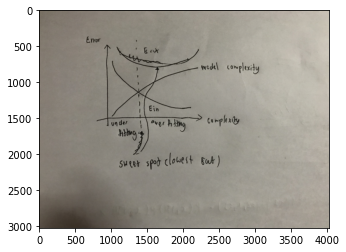

In [264]:
image = mpimg.imread('yo.jpg')
plt.imshow(image)
plt.show()

## Question (25)

Consider the followin ROC curve from an **overfitted** model (in blue) on a **training** data.

If we start regularizing it, will the regularized model's ROC curve on **training** data go in the red or green direction.

Justify your answer. Answer with no justification will receive no credit.

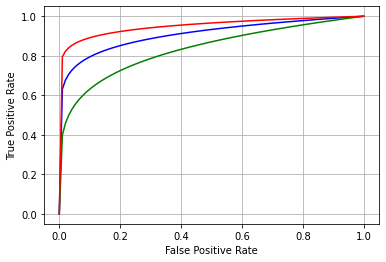

In [81]:
xs = np.linspace(0,1,100)
plt.plot(xs, xs**0.1, 'blue')
plt.plot(xs, xs**0.2, 'green')
plt.plot(xs, xs**0.05, 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

In [ ]:
#green: less area than red, training data has lower true positive rate

## Question (25)

Consider the followin ROC curve from an **overfitted** model (in blue) on a **testing** data.

If we start regularizing it, will the regularized model's roc curve on **testing** data go in the red or green direction.

Justify your answer. Answer with no justification will receive no credit.

In [47]:
xs = np.linspace(0,1,100)
plt.plot(xs, xs**0.1, 'blue')
plt.plot(xs, xs**0.2, 'green')
plt.plot(xs, xs**0.05, 'red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

In [ ]:
#red: better, larger area, nearer to one, greater high positive rate

# Multiclass Problem (100)

Consider the data given in `IRIS.csv`. You goal is to build a model to classify the flower into three species based on the features given and report the performance.

Perform the following task.

1. Separate the data in to train and test at approximately 70-30 ratio (10)
1. With one vs all strategy. Train three *linear* logistic classifier on training data set. (50)
1. Find confusion matrix on the test data set. (40)

Note:

Use scikit-learn if you like. This is meant to be a free problem.

Data taken from. You may even find some example there.
https://www.kaggle.com/arshid/iris-flower-dataset/data#


In [90]:
df = pd.read_csv('IRIS.csv')
df.columns = df.columns \
    .str.strip() \
    .str.lower() \
    .str.replace(' ', '_') \
    .str.replace('(', '') \
    .str.replace(')', '') \
    .str.replace('-','_') \
    .map(lambda x: 'x'+x if x in keyword.kwlist else x )

In [91]:
display(df)

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [139]:
# train_test_split(df.sepal_length,shuffle=False)
y = df.sepal_length
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,shuffle = False)
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [132]:
X, y = df.sepal_length, df.target
ovr = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(X, y)

AttributeError: 'DataFrame' object has no attribute 'target'

In [217]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0) #splitting data

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [251]:
x = df.to_numpy()
data = x[:,:-1] #iris.data
target = x[:,4:] #iris.target
X,y = data,target

[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['

In [221]:
ovr = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(X, y)
ovr.predict(X) #predict species

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [255]:
two = df.to_numpy()
for i in range(len(two)):
    if (two[i][4] == 'Iris-virginica'):
        two[i][4] = 0
    elif (two[i][4] == 'Iris-versicolor'):
        two[i][4] = 1
    else:
        two[i][4] = 2
dataTwo = two[:,1:]
targetTwo = two[:,:1]
for i in range(len(targetTwo)):
    print(type(targetTwo[i][0]))
XTwo,yTwo = dataTwo,targetTwo
ovrTwo = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(XTwo, yTwo)
ovrTwo.predict(XTwo)

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

ValueError: Unknown label type: (array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5.0],
       [5.4],
       [4.6],
       [5.0],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5.0],
       [5.0],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5.0],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5.0],
       [4.5],
       [4.4],
       [5.0],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5.0],
       [7.0],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5.0],
       [5.9],
       [6.0],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
       [6.1],
       [6.3],
       [6.1],
       [6.4],
       [6.6],
       [6.8],
       [6.7],
       [6.0],
       [5.7],
       [5.5],
       [5.5],
       [5.8],
       [6.0],
       [5.4],
       [6.0],
       [6.7],
       [6.3],
       [5.6],
       [5.5],
       [5.5],
       [6.1],
       [5.8],
       [5.0],
       [5.6],
       [5.7],
       [5.7],
       [6.2],
       [5.1],
       [5.7],
       [6.3],
       [5.8],
       [7.1],
       [6.3],
       [6.5],
       [7.6],
       [4.9],
       [7.3],
       [6.7],
       [7.2],
       [6.5],
       [6.4],
       [6.8],
       [5.7],
       [5.8],
       [6.4],
       [6.5],
       [7.7],
       [7.7],
       [6.0],
       [6.9],
       [5.6],
       [7.7],
       [6.3],
       [6.7],
       [7.2],
       [6.2],
       [6.1],
       [6.4],
       [7.2],
       [7.4],
       [7.9],
       [6.4],
       [6.3],
       [6.1],
       [7.7],
       [6.3],
       [6.4],
       [6.0],
       [6.9],
       [6.7],
       [6.9],
       [5.8],
       [6.8],
       [6.7],
       [6.7],
       [6.3],
       [6.5],
       [6.2],
       [5.9]], dtype=object),)